# Titanic Dataset Survival Classification

The [data](https://www.kaggle.com/c/titanic/data "kaggle titanic data") gives us information on the passangers of Titanic. 
<br>By that information, we will try to find a model to guess if the passanger survived or not.

Dataset consists of two parts: train and test. 
<br>We will use the train part to work on and test part to evaluate the results of the work.

Dataset have the columns: 

- survival:      Survival (0 = No, 1 = Yes)
- pclass:	    Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex:	        Sex	
- Age:	        Age in years	
- sibsp: 	    # of siblings / spouses aboard the Titanic	
- parch:	        # of parents / children aboard the Titanic	
- ticket:	    Ticket number	
- fare:  	    Passenger fare	
- cabin: 	    Cabin number	
- embarked:	    Port of Embarkation	 (C = Cherbourg, Q = Queenstown, S = Southampton)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [2]:
# We use pandas library to load the data into a dataframe
data_train = pd.read_csv('train.csv')
# We then asign column, row counts and column names to variable
rownum, colnum = data_train.shape
colnames = list(data_train.columns)
#Then we have a quick check the columns structure
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are 12 columns, 7 of them are numeric and 5 of them are categorical

In [3]:
# Let's have a quick look at the first rows of data
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Let's now have a quick look at the last rows of data
data_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Exploratory Data Analysis (EDA)

We check the some statistics of the numerical variables as start

In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We then check the counts of our target variable: <br> Counts of passangers survived and deceased:

342  passengers survived
549  passengers could not survive


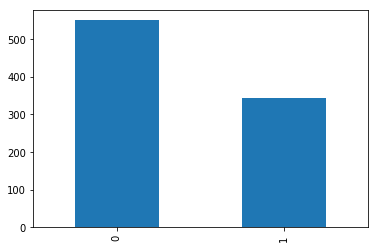

In [6]:
data_train["Survived"].value_counts().sort_index().plot(kind='bar')
print(len(data_train[data_train['Survived']==1])," passengers survived")
print(len(data_train[data_train['Survived']==0])," passengers could not survive")

We check the class counts and survival counts for each class

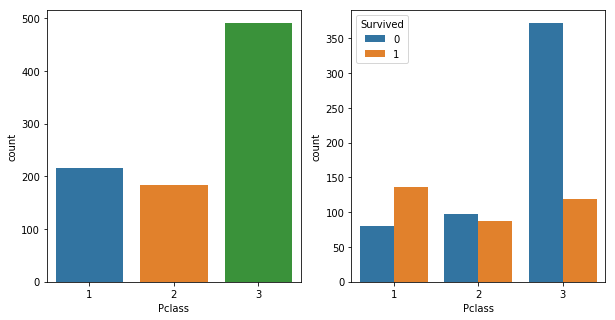

In [7]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.countplot(x = 'Pclass', data = data_train)
plt.subplot(122)
sns.countplot(x = 'Pclass', hue = 'Survived', data = data_train)

We can see the first class passangers have a higher survival rate

Similarly, we have a look at the survival - casualty counts for other variables <br> such as Parch, Embarked, Sex, Age ...

For variable Sex:

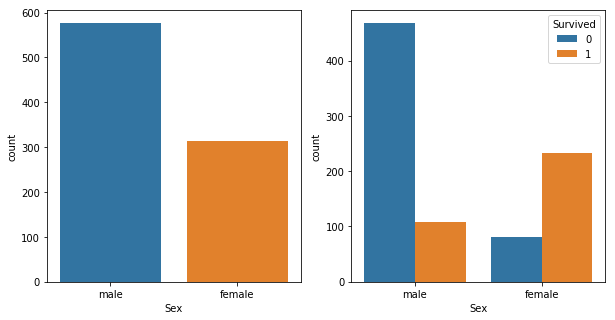

In [8]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.countplot(x = 'Sex', data = data_train)
plt.subplot(122)
sns.countplot(x = 'Sex', hue = 'Survived', data = data_train)

For variable SibSp: # of siblings / spouses aboard the Titanic

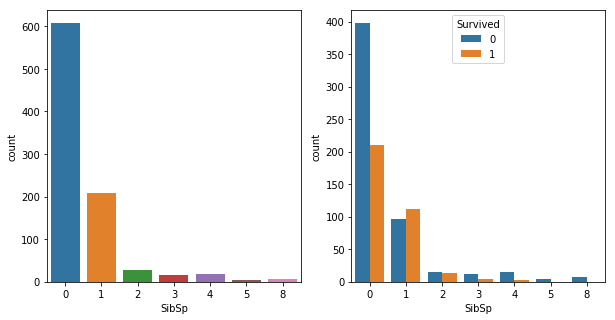

In [9]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.countplot(x = 'SibSp', data = data_train)
plt.subplot(122)
sns.countplot(x = 'SibSp', hue = 'Survived', data = data_train)

For variable Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

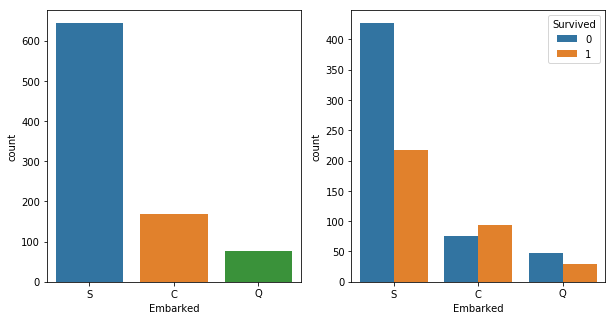

In [10]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.countplot(x = 'Embarked', data = data_train)
plt.subplot(122)
sns.countplot(x = 'Embarked', hue = 'Survived', data = data_train)

For variable Parch: # of parents / children aboard the Titanic

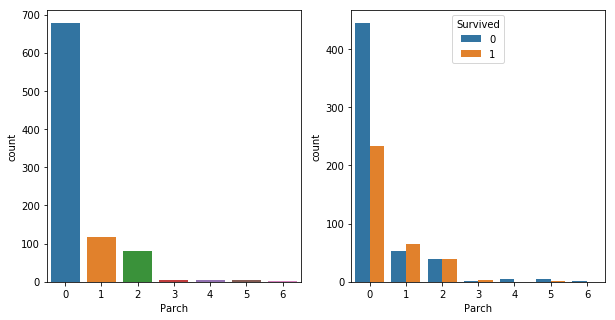

In [11]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.countplot(x = 'Parch', data = data_train)
plt.subplot(122)
sns.countplot(x = 'Parch', hue = 'Survived', data = data_train)

We make histogram of Age groups for survived and non-survived passangers

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DDCE4E5F8>,
      dtype=object)

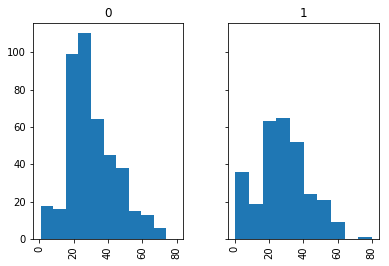

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
data_train.hist(column='Age',by='Survived', ax=axes)

We make histogram of Fare groups for survived and non-survived passangers

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DDD13D1D0>,
      dtype=object)

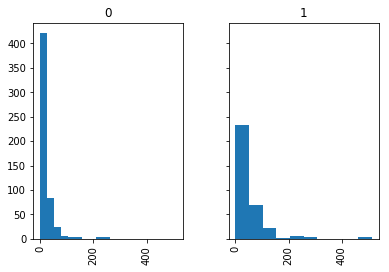

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
data_train.hist(column='Fare',by='Survived', ax=axes)

Now we can make histograms of numeric variables <br>(except of Survived for we already did above and PassangerID which is not a meaningful variable for histogram)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DDD213860>,
      dtype=object)

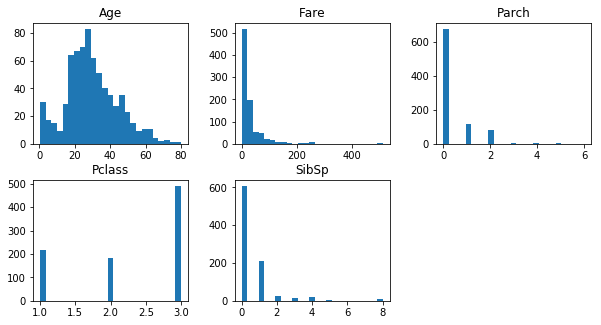

In [14]:
data_train[colnames[2:11]].hist(layout=(3,3),grid=False,figsize=(10,8),bins=25)

By those we had a rough idea about data, now we can pass to prepare data for modelling

# Data Preperation

Let's start by check the total NaN values in variables

In [15]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We reckon the Cabin does not give much information, we simply drop it.

In [16]:
data_train.drop("Cabin", axis = 1, inplace = True)

Name and Ticket can also be dropped from the dataframe

In [17]:
data_train.drop(["Name","Ticket"], axis = 1, inplace = True)
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

However there are still null values in Age and Embarked columns  <br>
It is not convenient to drop the column or 177 rows of the data <br>
We can assign the mean of the Age column for the null value <br>
We also can predict the value by building a model on other variables <br>
<br>
We will build a KNN model to predict the missing values <br>
This method is expected to be more accurate then using column mean for filling<br>
To do that, we will use knn imputation

In [18]:
from missingpy import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
#We temporarily change the categoricals to a format that can behave like numeric for the sake of imputation fitter 
data_train.loc[data_train["Sex"]=="male","Sex"] = "1"
data_train.loc[data_train["Sex"]=="female","Sex"] = "2"
data_train.loc[data_train["Embarked"]=="S","Embarked"] = "1"
data_train.loc[data_train["Embarked"]=="C","Embarked"] = "2"
data_train.loc[data_train["Embarked"]=="Q","Embarked"] = "3"
import warnings; warnings.simplefilter('ignore')

In [19]:
a = imputer.fit_transform(data_train)
#Output is an array, we convert it to dataframe
data_train = pd.DataFrame(data = a[0:,1:], index= a[0:,0], 
                 columns = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"])
#We rechange the categoricals to original values
data_train.loc[data_train["Sex"]==1,"Sex"] = "male"
data_train.loc[data_train["Sex"]==2,"Sex"] = "female"
data_train.loc[data_train["Embarked"]==1,"Embarked"] = "S"
data_train.loc[data_train["Embarked"]==2,"Embarked"] = "C"
data_train.loc[data_train["Embarked"]==3,"Embarked"] = "Q"

In [20]:
data_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64